<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Carlos Daniel Pérez Hernández y Pablo Alejandro Rivera Sánchez

**Fecha:** 8 de marzo de 2021.

**Expediente** : if722627 y if721005
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6

Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

#### Solución ``Pablo Alejandro Rivera Sánchez``

$$\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}$$

$$\frac{p_{i+1}}{p_i} = \frac{\frac{n! p^{i+1}(1-p)^{n-(i+1)}}{(i+1)!(n-(i+1))!}}{\frac{n!p^i(1-p)^{n-i}}{i!(n-i)!}}$$

$$\frac{p_{i+1}}{p_i} = \frac{n! p^{i+1}(1-p)^{n-(i+1)} i!(n-i)!}{(i+1)!(n-(i+1))! n!p^i(1-p)^{n-i}}$$

$$\frac{p_{i+1}}{p_i} = \frac{p^{i+1}(1-p)^{n-(i+1)} i!(n-i)!}{(i+1)!(n-i-1)! p^i(1-p)^{n-i}}$$

$$\frac{p_{i+1}}{p_i} = \frac{p^{i+1}(1-p)^{n-(i+1)} p^{-i}(1-p)^{-n+i} i!(n-i)!}{(i+1)!(n-i-1)! }$$

$$\frac{p_{i+1}}{p_i} = \frac{p^{i+1-i}(1-p)^{n-i-1-n+i} i!(n-i)!}{(i+1)!(n-i-1)!}$$

$$\frac{p_{i+1}}{p_i} = \frac{p i!(n-i)!}{(1-p) (i+1)!(n-i-1)!}$$

$$\frac{i!}{(i+1)!} = \frac{1}{i + 1}$$

$$\frac{p_{i+1}}{p_i} = \frac{p(n-i)!}{(1-p) (i+1)(n-i-1)!}$$

$$\frac{(n-i)!}{(n-i-1)} = n-i$$

$$\frac{p_{i+1}}{p_i} = \frac{p(n-i)}{(1-p)(i+1)}$$

$$p_{i+1} = \frac{p(n-i)}{(1-p)(i+1)} p_i$$

$$p_{i+1} = \frac{n-i}{i+1} \frac{p}{1-p} p_i$$

El que la ecuación sea recursiva ayuda o tiene ventajas debido a que no se usan los factoriales, los cuales, tienen una mayor carga computacional ya que es una multiplicación de muchos valores. En pocas palabras, el no tener que programar factoriales reduce la carga computacional y el tiempo. 

#### Solución ``Carlos Daniel Pérez Hernández``

Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
Demuestre matemáticamente que 
$$P(k+1)=\frac{\lambda}{k+1}P(k)$$
y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

#### Solución ``Pablo Alejandro Rivera Sánchez``

$$\frac{P(k+1)}{P(k)} = \frac{\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}}{\frac{e^{-\lambda}(\lambda)^k}{k!}}$$

$$\frac{P(k+1)}{P(k)} = \frac{e^{-\lambda}(\lambda)^{k+1} k!}{(k+1)! e^{-\lambda}(\lambda)^k}$$

$$\frac{P(k+1)}{P(k)} = \frac{(\lambda)^{k+1} k!}{(k+1)!(\lambda)^k}$$

$$\frac{P(k+1)}{P(k)} = \frac{(\lambda)^{k+1} (\lambda)^{-k} k!}{(k+1)!}$$

$$\frac{P(k+1)}{P(k)} = \frac{(\lambda)^{k+1-k} k!}{(k+1)!}$$

$$\frac{P(k+1)}{P(k)} = \frac{\lambda k!}{(k+1)!}$$

$$\frac{k!}{(k+1)!} = \frac{1}{k+1}$$

$$\frac{P(k+1)}{P(k)} = \frac{\lambda}{k+1}$$

$$P(k+1) = \frac{\lambda}{k+1} P(k)$$

In [1]:
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U = np.random.rand(N)
    rand2reales = {i: idx for i, idx in enumerate(indices)}
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

In [2]:
def p_acum_dist_pois(k:'Términos', l:'Valor de lambda'):
    '''
    Esta función calcula la probabilidad acumulada de la distribución de Poisson.
    '''
    p_acum = np.zeros(k)
    p_acum[0] = (np.exp(-l))
    def pb(i):
        nonlocal p_acum
        p_acum[i + 1] = (l / (i + 1)) * p_acum[i]
        
    [pb(i) for i in range(k - 1)]
    
    return np.cumsum(p_acum)

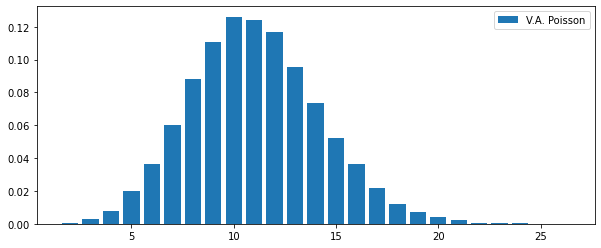

In [3]:
k, l, N = 1000, 10, 10000
p_acum_p = p_acum_dist_pois(k, l)
dist_pois = Gen_distr_discreta(p_acum_p, np.arange(0, k + 1), N)
plot_histogram_discrete(dist_pois, 'V.A. Poisson')

Generamos variables aleatorias que distribuyen Poisson con el método de la transformada inversa. Se usaron las funciones vistas en clase para obtener dichas variables aleatorias discretas, solamente se tuvo que encontrar la distribución de probabilidad acumulada de la distribución dada para después generar las variables aleatorias. 

#### Solución ``Carlos Daniel Pérez Hernández``

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$

### Ejercicio 1: 
Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

#### Solución ``Pablo Alejandro Rivera Sánchez``

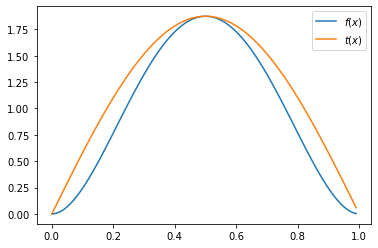

In [4]:
f = lambda x: 30 * (x**2 - 2 * x**3 + x**4)
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False)) 
t = lambda x: max_f * np.sin(np.pi * x)

x = np.arange(0, 1, 0.01) 

plt.plot(x, f(x), label = '$f(x)$')
plt.plot(x, t(x), label = '$t(x)$')
plt.legend()

Creamos las funciones de f y de t en base a lo descrito en el enunciado y con ayuda de funciones lambda. Evaluamos varios valores de x de 0 a 1 y posteriormente lo graficamos para ver si $t(x) > f(x)$, lo cual si se cumple. 

#### Solución ``Carlos Daniel Pérez Hernández``

### Ejercicio 2:
Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

#### Solución ``Pablo Alejandro Rivera Sánchez``

$$g(x) = \frac{t(x)}{c}$$

$$g(x) = \frac{1.875\sin({\pi x})}{\int_{0}^{1} 1.875\sin({\pi x}) dx}$$

$$g(x) = \frac{1.875\sin({\pi x})}{1.875 \int_{0}^{1} \sin({\pi x}) dx}$$

$$u = \pi x, du = \pi dx $$

$$g(x) = \frac{1.875\sin({\pi x})}{\frac{1.875}{\pi} \int_{0}^{1} \sin({u}) du}$$

$$g(x) = \frac{1.875\sin({\pi x})}{\frac{1.875}{\pi} [-\cos({\pi x}) \Big|_0^1]}$$

$$g(x) = \frac{1.875\sin({\pi x})}{\frac{1.875}{\pi} [2]}$$

$$g(x) = \frac{1.875\sin({\pi x})}{\frac{3.75}{\pi}}$$

$$g(x) = \frac{\pi}{2} \sin{(\pi x)}$$

Encontramos la función de densidad $g(x)$ en base a la fórmula que vimos en clase, la cual era $t(x)$ sobre $c$ que era la integral de $t(x)$ en cierto intervalo. Hacemos este cálculo y obtenemos la función de densidad. 

#### Solución ``Carlos Daniel Pérez Hernández``

### Ejercicio 3:
Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

#### Solución ``Pablo Alejandro Rivera Sánchez``

$$G(x) = \int_{0}^{x} \frac{\pi}{2} \sin{(\pi x)} dx$$

$$G(x) = \frac{\pi}{2} \int_{0}^{x} \sin{(\pi x)} dx$$

$$u = \pi x, du = \pi dx$$

$$G(x) = \frac{\pi}{2} \frac{1}{\pi} \int \sin{(u)} du$$

$$G(x) = - \frac{1}{2} [\cos{(\pi x)} \Big|_0^x]$$

$$G(x) = - \frac{1}{2} [\cos{(\pi x)} - 1]$$

$$G(x) = - \frac{1}{2}\cos{(\pi x)} + \frac{1}{2}$$

$$- \frac{1}{2}\cos{(\pi x)} + \frac{1}{2} = U$$

$$ \cos{(\pi x)} = -2U + 1$$

$$ \pi x = \cos^{-1}{(-2U + 1)}$$

$$ x = \frac{\cos^{-1}{(-2U + 1)}}{\pi}$$

Para encontrar la distribución de probabilidad acumulada, la cual necesitamos para el método de la transformada inversa, hay que integrar la función de densidad que encontramos en el punto anterior. Posteriormente, aplicamos lo visto en el método de la transformada inversa, igualamos la función de probabilidad acumulada a U y despejamos para x (obtenemos la inversa) y nos da el resultado que se muestra anteriormente. La función de x despejada nos servirá para generar variables aleatorias en base a la distribución dada.

#### Solución ``Carlos Daniel Pérez Hernández``

### Ejercicio 4:
Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
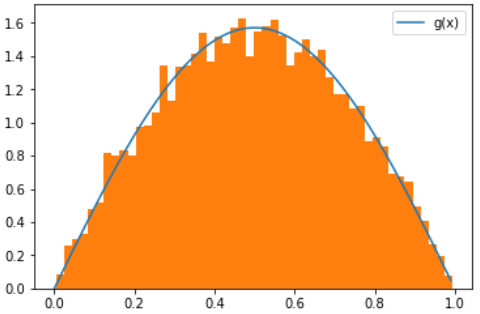

#### Solución ``Pablo Alejandro Rivera Sánchez``

In [5]:
def dist_gx(N):
    # Variable aleatorias de la distribución
    x_distr = np.zeros(N)
    def x_dist_gx(i):
        nonlocal x_distr
        x_distr[i] = np.arccos(-2 * np.random.random() + 1) / np.pi
        
    [x_dist_gx(i) for i in range(N)]
    
    x = np.arange(0,1,0.01)
    # Derivada
    g_min_x = (np.pi / 2) * np.sin(np.pi * x)
    
    plt.hist(x_distr, bins = 20, density = True)
    plt.plot(x, g_min_x, linewidth = 4, color = 'red', label = '$g(x)$')
    plt.legend()
    plt.show()

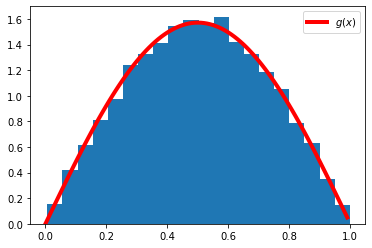

In [6]:
dist_gx(10000)

En una función, usando funciones anidadas, generamos las variables aleatorias de la distribución dada con la fórmula obtenida, graficamos el histograma de las mismas y también graficamos la función de densidad para comprobar que estamos generando dichas variables aleatorias de manera correcta. 

#### Solución ``Carlos Daniel Pérez Hernández``

### Ejercicio 5:
Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
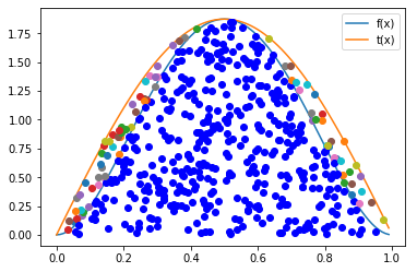

#### Solución ``Pablo Alejandro Rivera Sánchez``

In [7]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]       
    plt.show()
        
    x = [R1[i] for i in range(len(R1)) if condition[i]] 
    
    return x

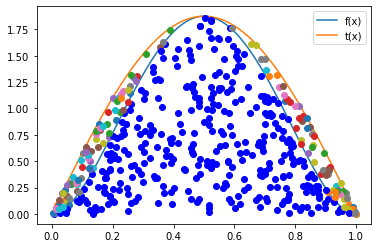

In [8]:
N = 500 

R2 = np.random.rand(N) 
R1 = np.random.uniform(0, 1, size = N) 

plt.plot(x,f(x),label='f(x)') 
plt.plot(x,t(x),label='t(x)') 
plt.legend()

x_r = Acep_rechazo(R2, R1, f, t)

Con ayuda de la función creada en clase, usamos el método de aceptación rechazo para generar nuestras variables aleatorias de la distribución dada. Ya tenemos los argumentos de f y de t que calculamos anteriormente, solamente creamos R1 y R2, corremos la función y nos genera el resultado de arriba. 

#### Solución ``Carlos Daniel Pérez Hernández``

### Ejercicio 6:
Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

#### Solución ``Pablo Alejandro Rivera Sánchez``

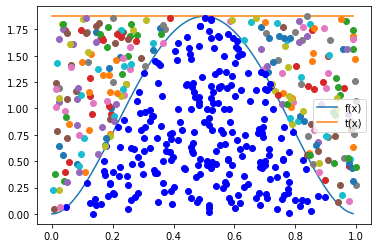

In [9]:
t2 = lambda x: max_f * np.ones([len(x)])

plt.plot(x,f(x),label='f(x)') 
plt.plot(x,t2(x),label='t(x)') 
plt.legend()

x_r2 = Acep_rechazo(R2, R1, f, t2)

In [10]:
p_sen = len(x_r) / N
p_con = len(x_r2) / N

print('El porcentaje de aceptación de la función senoidal es de: ', round(p_sen*100,2),'%')
print('El porcentaje de aceptación de la función constante es de: ', round(p_con*100,2),'%')

El porcentaje de aceptación de la función senoidal es de:  68.0 %
El porcentaje de aceptación de la función constante es de:  49.4 %


Creamos una nueva función t, la cual será constante en el máximo de la función f y repetimos el método de aceptación y rechazo con esta nueva t. Después, calculamos cuántos de los valores que generamos fueron aceptados con ambas funciones y vemos que la función de seno aceptó más que la función constante, esto ocurre siempre.

#### Solución ``Carlos Daniel Pérez Hernández``

### Ejercicio 7:
Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

#### Solución ``Pablo Alejandro Rivera Sánchez``

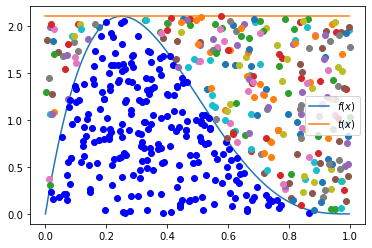

[0.25964697113019475,
 0.3461440756823958,
 0.4327807019696992,
 0.1255111040375837,
 0.15859882614310872,
 0.3469120852565888,
 0.20065327224244922,
 0.3458299611351473,
 0.5523381690347249,
 0.45285714501637264,
 0.7296857374939982,
 0.4658459653177911,
 0.6239486521443133,
 0.5198701817290797,
 0.2081667589187104,
 0.5275793139895845,
 0.3031912923894362,
 0.28629986438504385,
 0.1477155514693944,
 0.0884844409913581,
 0.38773688245030147,
 0.08506155602742527,
 0.30750568661083655,
 0.3465156851199326,
 0.33216445361270497,
 0.34551497954789034,
 0.6525911631930637,
 0.13722290724872221,
 0.324393497381944,
 0.24067079108824585,
 0.4435588735746959,
 0.4323830023615486,
 0.44950813958519853,
 0.7359965891320235,
 0.3786547782717239,
 0.34114023361301105,
 0.2615711554659914,
 0.21055041018668474,
 0.6084929820444629,
 0.5234172254346414,
 0.4500809979246059,
 0.34401984481047176,
 0.24682189704585167,
 0.39857234777545725,
 0.661520776701449,
 0.4855023474354956,
 0.258734930027805

In [11]:
f7 = lambda x: 20 * x * (1 - x) ** 3
max_f7 = f7(optimize.fmin(lambda x:-f7(x), 0, disp=False)) 

N2 = 500
x2 = np.arange(0, 1, 1/N2)
t7 = lambda x: max_f7 * np.ones([len(x2)])

plt.plot(x2, f7(x2), label = '$f(x)$')
plt.plot(x2, t7(x2), label = '$t(x)$')
plt.legend()

R22 = np.random.rand(N) 
R11 = np.random.uniform(0, 1, size = N2) 

X_v = Acep_rechazo(R22, R11, f7, t7)

X_v

Generamos las variables aleatorias usando el método de aceptación rechazo para la función f dada, en esta caso se usó una función t constante para calcular dichas variables. Las variables aleatorias generadas con esta PDF se encuentran en la variables X_v y están representadas en la gráfica por los puntos azules.

#### Solución ``Carlos Daniel Pérez Hernández``

### LINK REPOSITORIO
[Link repositorio Github](https://github.com/danielperhez/Tarea6_PRivera_CPerez)